# Assignment -2 : Neural Network for Classify 3 class from dataset 

### Neural Network
This neural network processes input features (Glucose,BMI) through layers of interconnected neurons.Each layer applies weights, biases & ReLu activation functions to transform the data and capture patterns.The output layer uses Softmax activation for predicts probabilities for each class (no diabetes, type 1 Diabetes, type 2 Diabetes) with the highest probability indicating the final classification.Through training,the network adjusts weights to minimize prediction errors.


### Loading Necessary Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

### GPU Config

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


### Loading Dataset

In [3]:
path = "T:\CodeBase\Python\Computer Vision\MID\A2\dt2.csv"
data = pd.read_csv(path)

### Data Description

Describing Mean,standard dev,max,min,25%,50%,75% values for each attributes in dataset

In [4]:
data.describe()

,Glucose,BMI,Outcome
count,47.000000,47.000000,47.000000
mean,143.723404,28.765957,1.021277
std,45.867817,8.795287,0.820640
min,63.000000,13.000000,0.000000
25%,96.500000,23.000000,0.000000
50%,154.000000,25.000000,1.000000
75%,178.000000,39.000000,2.000000
max,210.000000,46.000000,2.000000


### Ploting the dataset

C:\Users\tisha\AppData\Local\Temp\ipykernel_20544\3364106270.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.get_cmap('plasma', len(classNames)), marker='o', s=20)


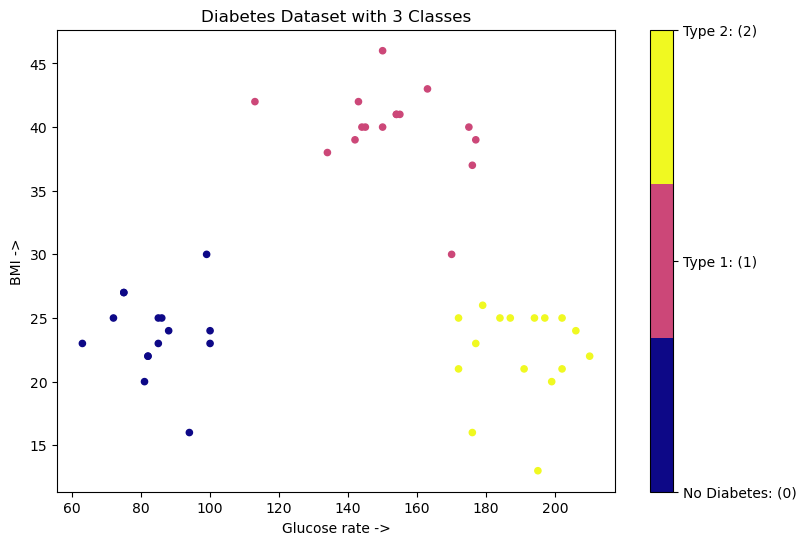

In [5]:
X = data[['Glucose','BMI']].values
Y = data['Outcome'].values


classNames = ['No Diabetes: (0)', 'Type 1: (1)', 'Type 2: (2)']
plt.figure(figsize=(9, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.get_cmap('plasma', len(classNames)), marker='o', s=20)
cbar = plt.colorbar(scatter, ticks=range(len(classNames)))
cbar.set_ticklabels(classNames[::1])
plt.title('Diabetes Dataset with 3 Classes')
plt.xlabel('Glucose rate ->')
plt.ylabel('BMI ->')

plt.show()

### Spliting the Dataset
1. For training 80% data will be used
2. For testing 20% data will be used

In [6]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2)

## Implementing Neural Network

### *Architecture of this Network
1. In Input Layer contains 2 Input Neurons for taking 2 Dimentional data
2. Adding 3 hidden layers with each 500 neurons
3. In Output layer, there is 3 output neuron for predict 3 class

### *Working process
1. Randomly initialized weights and biases for each layer
2. Forward Propagates inputs through the layers to generate predictions 
3. ReLu activation function used for hidden layers 
4. Softmax Activation function for output layer(prevent numerical overflow by subtracting the maximum value from the input before   exponentiating. This ensures the exponentiated values don't become too large)
5. calculating error of output with respect to actual data (Training part)
6. Backpropagation: Adjusts weights and biases based on the error between predicted and actual values
7. Learning rate (eta) -> 0.01 

In [ ]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 300
        hiddenLayerNeurons2 = 300
        hiddenLayerNeurons3 = 300
        outLayerNeurons = 3

        self.eta = 0.0000001

        self.Whl1 = np.random.randn(inputLayerNeurons,hiddenLayerNeurons1)
        self.Whl2 = np.random.randn(hiddenLayerNeurons1,hiddenLayerNeurons2)
        self.Whl3 = np.random.randn(hiddenLayerNeurons2,hiddenLayerNeurons3)
        self.WoH = np.random.randn(hiddenLayerNeurons3,outLayerNeurons)

        self.bH1 = np.zeros(hiddenLayerNeurons1)
        self.bH2 = np.zeros(hiddenLayerNeurons2)
        self.bH3 = np.zeros(hiddenLayerNeurons3)
        self.bO = np.zeros(outLayerNeurons)

    def relu(self,x,der=False):
        if der == True:
            return np.where(x>0,1,0)
        else :
            return np.maximum(0,x)

    def softmax(self,x):
        eX = np.exp(x - np.max(x,axis=1,keepdims=True))
        return eX / np.sum(eX,axis=1,keepdims=True)

    def feedForward(self, X):
        self.h1In = np.dot(X, self.Whl1) + self.bH1
        self.h1out = self.relu(self.h1In)

        self.h2In = np.dot(self.h1out,self.Whl2) + self.bH2
        self.h2out= self.relu(self.h2In)

        self.h3IN = np.dot(self.h2out,self.Whl3) + self.bH3
        self.h3out = self.relu(self.h3IN)

        self.outIN = np.dot(self.h3out,self.WoH) + self.bO
        pred = self.softmax(self.outIN)

        return pred

    def backPropagation(self,X,Y,pred):
        outErr = Y - pred
        outDelta = outErr

        h3Err = outDelta.dot(self.WoH.T)
        h3Delta = h3Err*self.relu(self.h3out,der=True)

        h2Err = h3Delta.dot(self.Whl3.T)
        h2Delta = h2Err*self.relu(self.h2out,der=True)

        h1Err = h2Delta.dot(self.Whl2.T)
        h1Delta = h1Err*self.relu(self.h1out,der=True)

        self.Whl1 += self.eta*X.T.dot(h1Delta)
        self.bH1 += self.eta*h1Delta.sum()

        self.Whl2 += self.eta*self.h1out.T.dot(h2Delta)
        self.bH2 += self.eta*h2Delta.sum()

        self.Whl3 += self.eta*self.h2out.T.dot(h3Delta)
        self.bH3 += self.eta*h3Delta.sum()

        self.WoH += self.eta*self.h3out.T.dot(outDelta)
        self.bO += self.eta*outDelta.sum()

    def train(self,X,Y):
        pred = self.feedForward(X)
        self.backPropagation(X,Y,pred)


### One Hot Encode

In [8]:
yTrainEde = np.zeros((Y_train.size,3))
for i,l in enumerate(Y_train):
    yTrainEde[i,int(l)] = 1

### Object creation 
Creating Object of the model 

In [9]:
nn = NeuralNetwork()

### Training Phase 
1. Training the network with 5000 epochs
2. Plotting training Losses vs Epochs

Epoch 0,Loss: 0.432432


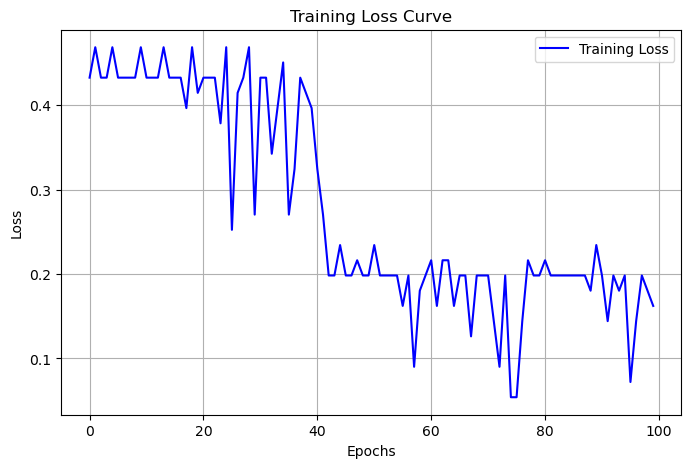

In [ ]:
epochs = 1000
err = []

for epoch in range(epochs):
    nn.train(X_train,yTrainEde)
    
    loss = np.mean(np.square(yTrainEde - nn.feedForward(X_train)))
    err.append(loss)
    
    if epoch % 100 == 0 :
        print(f'Epoch {epoch},Loss: {loss:.6f}')
        
plt.figure(figsize=(8, 5))
plt.plot(err, label="Training Loss", color="blue")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

### Heatmap of Neural network learning Boundary

heatmap for 3 classes uses 3 distinct colors to show the model's decision boundaries,
coloring regions by predicted classes to visualize classification and pattern recognition.
Illustrating how inputs are classified into 3 classes.

C:\Users\tisha\AppData\Local\Temp\ipykernel_20544\177673127.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx,yy,Z,alpha=0.8,cmap=plt.cm.get_cmap('plasma',3))
C:\Users\tisha\AppData\Local\Temp\ipykernel_20544\177673127.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,edgecolors='k',marker='o',cmap=plt.cm.get_cmap('plasma',3))


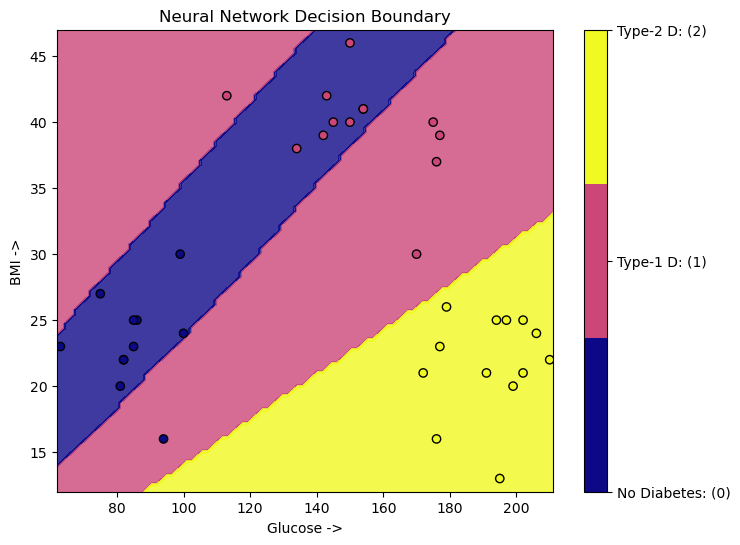

In [11]:
xMin,xMax = X[:,0].min()-1, X[:,0].max()+1
yMin,yMax = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(xMin,xMax,100),np.linspace(yMin,yMax,100))

Z = nn.feedForward(np.c_[xx.ravel(),yy.ravel()])
Z = np.argmax(Z,axis=1)
Z = Z.reshape(xx.shape)

classNames = ['No Diabetes: (0)','Type-1 D: (1)','Type-2 D: (2)']
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,Z,alpha=0.8,cmap=plt.cm.get_cmap('plasma',3)) 
scatter = plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,edgecolors='k',marker='o',cmap=plt.cm.get_cmap('plasma',3))  

cbar = plt.colorbar(scatter, ticks=range(3))
cbar.set_ticklabels(classNames[::1])

plt.title('Neural Network Decision Boundary')
plt.xlabel('Glucose ->')
plt.ylabel('BMI ->')
plt.show()

### Accuracy of this model

In [12]:
yPred = nn.feedForward(x_test)
yPredCls = np.argmax(yPred,axis=1)

accuracy = accuracy_score(y_test, yPredCls)
print("Accuracy of this model :",accuracy*100,'%')

Accuracy of this model : 60.0 %


### Testing Phrase

### Test 1
with Glucose = 130 && BMI = 24

In [13]:
# test 1
glucose1 = 130
BMI1 = 24
test1 = nn.feedForward([[glucose1, BMI1]])

predCls1 = np.argmax(test1)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test1[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predCls1]} ({test1[0][predCls1]:.4f})")

Classes with Probabilities:

Class 1 (No Diabetes: (0)): 0.0000
Class 2 (Type-1 D: (1)): 1.0000
Class 3 (Type-2 D: (2)): 0.0000

Predicted Class:
Type-1 D: (1) (1.0000)


### Test2
with Glucose = 120 && BMI = 34

In [14]:
# test 2
glucose2 = 270
BMI2 = 25
test2 = nn.feedForward([[glucose2,BMI2]])

predCls2 = np.argmax(test2)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test2[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predCls2]} ({test2[0][predCls2]:.4f})")

Classes with Probabilities:

Class 1 (No Diabetes: (0)): 0.0000
Class 2 (Type-1 D: (1)): 0.0000
Class 3 (Type-2 D: (2)): 1.0000

Predicted Class:
Type-2 D: (2) (1.0000)
